In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
data = '''In the town of Athy one Jeremy Lanigan
Battered away til he hadnt a pound.
His father died and made him a man again 
Left him a farm and ten acres of ground. 
He gave a grand party for friends and relations 
Who didnt forget him when come to the wall, 
And if youll but listen Ill make your eyes glisten 
Of the rows and the ructions of Lanigans Ball. 
Myself to be sure got free invitation, 
For all the nice girls and boys I might ask, 
And just in a minute both friends and relations 
Were dancing round merry as bees round a cask. 
Judy ODaly, that nice little milliner, 
She tipped me a wink for to give her a call, 
And I soon arrived with Peggy McGilligan 
Just in time for Lanigans Ball. 
There were lashings of punch and wine for the ladies, 
Potatoes and cakes; there was bacon and tea, 
There were the Nolans, Dolans, OGradys 
Courting the girls and dancing away. 
Songs they went round as plenty as water, 
The harp that once sounded in Taras old hall,
Sweet Nelly Gray and The Rat Catchers Daughter,
All singing together at Lanigans Ball. 
They were doing all kinds of nonsensical polkas 
All round the room in a whirligig. 
Julia and I, we banished their nonsense 
And tipped them the twist of a reel and a jig. 
Ach mavrone, how the girls got all mad at me 
Danced til youd think the ceiling would fall. 
For I spent three weeks at Brooks Academy 
Learning new steps for Lanigans Ball. 
Three long weeks I spent up in Dublin, 
Three long weeks to learn nothing at all,
Three long weeks I spent up in Dublin, 
Learning new steps for Lanigans Ball. 
She stepped out and I stepped in again, 
I stepped out and she stepped in again, 
She stepped out and I stepped in again, 
Learning new steps for Lanigans Ball. 
Boys were all merry and the girls they were hearty 
And danced all around in couples and groups, 
Til an accident happened, young Terrance McCarthy 
Put his right leg through miss Finnertys hoops. 
Poor creature fainted and cried Meelia murther, 
Called for her brothers and gathered them all. 
Carmody swore that hed go no further 
Til he had satisfaction at Lanigans Ball. 
In the midst of the row miss Kerrigan fainted, 
Her cheeks at the same time as red as a rose. 
Some of the lads declared she was painted, 
She took a small drop too much, I suppose. 
Her sweetheart, Ned Morgan, so powerful and able, 
When he saw his fair colleen stretched out by the wall, 
Tore the left leg from under the table 
And smashed all the Chaneys at Lanigans Ball. 
Boys, oh boys, twas then there were runctions. 
Myself got a lick from big Phelim McHugh. 
I soon replied to his introduction 
And kicked up a terrible hullabaloo. 
Old Casey, the piper, was near being strangled. 
They squeezed up his pipes, bellows, chanters and all. 
The girls, in their ribbons, they got all entangled 
And that put an end to Lanigans Ball.'''


In [53]:
data = '''
중소기업중앙회장님과 전국에서 오신 중소기업인, 소상공인 여러분!
반갑습니다. 2019 대한민국 중소기업인대회를 축하드립니다. 중소기업이 살
아야 우리 경제의 활력이 살아납니다. 문재인정부 3년의 시작을 중소기업인 여
러분과 함께하게 돼서 매우 뜻깊고 기쁘게 생각합니다.
우리는 지난해 ‘30-50클럽’, 인구가 5,000만 명 이상이면서 1인당 국민소득 3
만 달러를 이룬 세계 일곱 번째 나라가 되었습니다. 2차 세계대전 이후 독립국
중 유일할 뿐만 아니라 전쟁의 폐허 위에서 이룬 아주 값진 성과입니다. 대한민
국 경제의 근간이자 국민의 일터인 중소기업이 중심이 되어 이뤄낸 성과입니다.
이 자리를 빌려서 감사드립니다.
특히 R&D, 일자리, 수출, 창업벤처 등 각 분야에서 우수한 성과로 오늘 수상하
는 중소기업인 여러분께 축하와 감사의 인사를 드립니다.
중소기업인 여러분!
4차 산업혁명 시대에 예측할 수 없는 내일, 불확실성은 중소기업이 겪는 가장
큰 어려움입니다. 특히 급격한 세계경제의 변화는 중소기업이 대응하기 쉽지 않
고, 산업구조의 변화도 미리 준비하지 않으면 이겨내기가 쉽지 않습니다. 그러나
제가 만난 모든 중소기업인들은 어떤 어려움 속에서도 결코 기업가로서의 사명
을 잃지 않았습니다. 중소기업인의 어깨 위에는 회사의 미래뿐만 아니라 직원들
과 그들 가족의 미래까지 달려 있습니다.
“아이 하나를 키우는 데 한 마을이 필요”한 것처럼 한 개의 중소기업이 성공하
려면 한 사회가 필요합니다. 중소기업의 안정적 운영을 위해 위험부담과 책임을
국가가 함께 나누어야 합니다. 기업가 정신을 마음껏 발휘하고 성장할 수 있도록
국가가 적극적으로 나서 도와야 합니다.
우리 정부는 중소기업을 경제의 중심에 놓고 정책의 틀을 근본적으로 바꾸고자
노력해 왔습니다. 최초로 중소벤처기업부를 신설하여 각 부처의 다양한 중소기업
정책을 종합적으로 관리하고 조정하게 했습니다. 또한 정부 모든 부처가 머리를
맞대고 정책을 발굴하고 예산을 지원하기 위해 최선을 다하고 있습니다. 올해에
만 1,653개 사업, 22조 원 가까운 예산이 중소기업을 직접 지원하는 데 사용됩니
다. 작년보다 10% 증액된 예산입니다.
무엇보다 중소기업이 스스로 역량을 높일 수 있도록 정책을 집중하고 있습니
다. 2019년에만 스마트공장 4,000개를 구축하고 2022년까지 10인 이상 중소제
조업 절반에 해당하는 3만 개로 확대할 계획입니다. R&D정책도 민간 주도 체제
로 개편하고 업종별 지원을 강화했습니다.
시장 여건을 개선하는 일 또한 중요합니다. 혁신제품, 기술개발제품 등 아직
시장이 성숙되지 않은 제품은 수요가 창출되어야만 기업과 산업이 활성화될 수
있습니다. 공공이 수요 창출의 마중물이 되도록 조달체계를 개편하고, 공영홈쇼
핑과 중소기업유통센터를 이용해 홈쇼핑·온라인몰·백화점·대형마트 등 우수
제품이 다양한 경로로 소비자와 만날 수 있도록 돕고 있습니다.
우리 중소기업의 무대는 아주 넓습니다. 우수한 기술력은 이미 세계적으로 인정받고 있습니다. 
지난해 우리는 최초로 수출 6,000억 달러를 돌파했는데, 중소기업 수출이 2년 연속 1,000억 달러를 넘으며 
사상 최대를 기록함으로써 아주 큰 몫을 했습니다. 규모와 상관없이 새로운 아이디어와 기술개발로 거둔 성취입
니다. 벤처창업과 투자액도 사상 최대를 기록해 제2벤처 붐을 기대하고 있습니
다. 기업가치 1조 원이 넘는 유니콘기업도 이미 8개로 늘어났습니다.
그러나 한편에서는 법률·특허·회계·마케팅 등의 어려움으로 판로개척에 어
려움을 겪고 있기도 합니다. 55조 원 규모의 무역보험 지원, 맞춤형 컨설팅, 대기
업과의 동반 상생 진출 등 다각적인 노력을 통해 글로벌기업으로의 성장을 돕겠
습니다.
최근 잇따라 육성책이 발표되고 있는 수소차 등 미래차, 시스템 반도체, 바이
오, 5G 등 4차 산업혁명 시대 주력산업들은 중소기업들이 주역이 될 수 있는 분
야들입니다. 세제, 혁신금융 같은 전방위적인 지원을 통해 전통 제조업의 혁신과
신산업 확산을 뒷받침하겠습니다.
열정과 창의로 넘치는 청년, 많은 경험으로 관록이 쌓인 중년이 중소기업으로
몰려들어야 중소기업이 더욱 성장할 수 있습니다. 기업에 필요한 인재를 양성하
고 일자리 우수기업 지원을 강화하겠습니다. 청년내일채움공제를 비롯한 중소
기업 근로자 맞춤형 복지서비스를 제공해 우수인력이 중소기업을 선호하도록
돕겠습니다.
벤처창업과 벤처기업 성장도 더욱 촉진하겠습니다. 효과 없는 규제는 과감히 털
어내겠습니다. ICT·산업융합·금융 분야 규제 샌드박스제도는 시행 4개월 만에
이미 49건의 승인실적을 올렸고 연말까지 100건을 돌파할 전망입니다. 규제혁
신을 통한 지역 신산업 육성을 위해 규제자유특구제도도 추진하고 있습니다.
중소기업인 여러분!
기업인들이 가장 중요하게 생각하는 덕목은 신용입니다. 상거래에서는 신용도
중요하지만 정부와 중소기업 간 신용도 매우 중요합니다. 정부를 신용할 수 있어
야 기업은 미래를 불안해 하지 않고 혁신적인 기술개발과 도전적인 투자에 나설
수 있을 것입니다. 우리 정부의 의지는 확고합니다.
중소기업은 우리 경제의 허리입니다. 중소기업이 성공해야 일자리와 가계소
득이 늘고 국민이 잘살게 됩니다. 국민이 잘살고 소비가 늘면 소상공인도 활력을
갖게 됩니다. 국가경제가 성장하고 시장규모가 커질 때 더 많은 기업이 함께 성
공을 누릴 수 있습니다. 중소기업과 대기업이 상생하는 경제생태계가 만들어지
면 더 많은 기업이 성공하고 우리 경제활력도 커질 것입니다. 중소기업의 성장은
우리 정부의 변함없는 목표라는 것을 다시 한번 강조합니다.
공정한 경제정책 위에서 당당하게 경쟁하며 자발적인 상생협력이 이뤄지도록
하겠습니다. 기업이 정부와 시장을 신뢰하고 적극적으로 도전과 재도전을 할 수
있는 환경을 만들겠습니다. 시행착오와 실패가 사회적 경험으로 축적되도록 하
겠습니다. 최저임금, 탄력근로제, 주 52시간 근로제 등 사회적 대타협이 필요한
사안에 대해서도 우리 기업인들의 목소리에 더욱 귀를 기울이겠습니다.
중소기업인 여러분!
정부의 경제정책과 성과가 당장은 체감되지 않을 수 있습니다. 특히 경제정책
의 근본적인 변화가 안착되기에는 시간이 걸립니다. 통계와 현장의 온도차도 물
론 있을 것입니다. 그러나 총체적으로 본다면 우리 경제는 성공으로 나아가고 있
고, 우리 중소기업도 매일매일 기적을 써 내려가고 있습니다.
답은 현장에 있다고 믿습니다. 우리 정부가 첫해 경제정책 방향을 제시하고 2
년 차에 혁신적 포용국가의 시동을 걸었다면, 올해 3년 차에는 반드시 현장에서
체감하는 성과를 창출하겠습니다. 중소기업인이 스스로 자랑스러워할 수 있는
나라, 중소기업인과 중소기업 근로자들이 함께 잘사는 나라를 만들기 위해 정부
는 힘을 모을 것입니다.
중소기업이 대한민국 경제의 주역입니다. 오늘 이 자리를 통해 여러분의 혁신
과 도전의 열기가 더 커지길 바랍니다. 정부가 여러분의 힘이 되겠습니다.
감사합니다. 
'''

In [54]:
tokenizer = Tokenizer()
corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'수': 1, '우리': 2, '있습니다': 3, '중소기업이': 4, '등': 5, '중소기업인': 6, '경제의': 7, '여러분': 8, '위해': 9, '중소기업': 10, '있는': 11, '것입니다': 12, '달러를': 13, '아주': 14, '특히': 15, '고': 16, '그러나': 17, '한': 18, '중소기업의': 19, '함께': 20, '합니다': 21, '있도록': 22, '중소기업을': 23, '정책을': 24, '다': 25, '지원을': 26, '이미': 27, '통해': 28, '많은': 29, '더욱': 30, '정부의': 31, '더': 32, '기업이': 33, '경제정책': 34, '대한민국': 35, '매우': 36, '우리는': 37, '지난해': 38, '만': 39, '이룬': 40, '아니라': 41, '위에서': 42, '성과입니다': 43, '이': 44, '자리를': 45, 'r': 46, '일자리': 47, '수출': 48, '각': 49, '우수한': 50, '오늘': 51, '는': 52, '4차': 53, '산업혁명': 54, '없는': 55, '가장': 56, '큰': 57, '쉽지': 58, '모든': 59, '과': 60, '데': 61, '국가가': 62, '성장할': 63, '적극적으로': 64, '최초로': 65, '다양한': 66, '했습니다': 67, '또한': 68, '정부': 69, '1': 70, '원': 71, '스스로': 72, '있습니': 73, '개편하고': 74, '중요합니다': 75, '000억': 76, '사상': 77, '최대를': 78, '벤처창업과': 79, '맞춤형': 80, '신산업': 81, '경험으로': 82, '필요한': 83, '신용도': 84, '정부와': 85, '있을': 86, '국민이': 87, '됩니다': 88, '커질': 89, '사회적': 90, '정부가': 91, '여러분의': 92, '중소기업중앙회장님과': 93, '전국에서':

In [55]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1], input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [56]:
print(xs[6])
print(ys[6])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 97 98]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [57]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 97]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 

In [58]:
print(tokenizer.word_index)

{'수': 1, '우리': 2, '있습니다': 3, '중소기업이': 4, '등': 5, '중소기업인': 6, '경제의': 7, '여러분': 8, '위해': 9, '중소기업': 10, '있는': 11, '것입니다': 12, '달러를': 13, '아주': 14, '특히': 15, '고': 16, '그러나': 17, '한': 18, '중소기업의': 19, '함께': 20, '합니다': 21, '있도록': 22, '중소기업을': 23, '정책을': 24, '다': 25, '지원을': 26, '이미': 27, '통해': 28, '많은': 29, '더욱': 30, '정부의': 31, '더': 32, '기업이': 33, '경제정책': 34, '대한민국': 35, '매우': 36, '우리는': 37, '지난해': 38, '만': 39, '이룬': 40, '아니라': 41, '위에서': 42, '성과입니다': 43, '이': 44, '자리를': 45, 'r': 46, '일자리': 47, '수출': 48, '각': 49, '우수한': 50, '오늘': 51, '는': 52, '4차': 53, '산업혁명': 54, '없는': 55, '가장': 56, '큰': 57, '쉽지': 58, '모든': 59, '과': 60, '데': 61, '국가가': 62, '성장할': 63, '적극적으로': 64, '최초로': 65, '다양한': 66, '했습니다': 67, '또한': 68, '정부': 69, '1': 70, '원': 71, '스스로': 72, '있습니': 73, '개편하고': 74, '중요합니다': 75, '000억': 76, '사상': 77, '최대를': 78, '벤처창업과': 79, '맞춤형': 80, '신산업': 81, '경험으로': 82, '필요한': 83, '신용도': 84, '정부와': 85, '있을': 86, '국민이': 87, '됩니다': 88, '커질': 89, '사회적': 90, '정부가': 91, '여러분의': 92, '중소기업중앙회장님과': 93, '전국에서':

In [59]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 15, 64)            39360     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40)                13600     
_________________________________________________________________
dense_3 (Dense)              (None, 615)               25215     
Total params: 78,175
Trainable params: 78,175
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
22/22 [==============================] - 3s 7ms/step - loss: 6.4234 - accuracy: 1.2476e-04
Epoch 2/500
22/22 [==============================] - 0s 7ms/step - loss: 6.4109 - accuracy: 0.0052
Epoch 3/500
22/22 [==============================] - 0s 7ms/step - loss: 6.3875 - accuracy: 0.0215
Epoch 4/500
22/22 [==============================] - 0s 7ms/step - loss: 6.2919 - accuracy: 0.0323
Epoch 5/500
22/22 [==============================] - 0s 7ms/step - loss: 6.2119 - accuracy: 0.0159
Epoch 6/500
22/22 [==============================] - 0s 7ms/step - loss: 6.1546 - accuracy: 0.0111
Epoch 7/500
22/22 [==============================] - 0s 7ms/step - loss: 6.0931 - accuracy: 0.0237
Epoch 8/500
22/22 [==============================] - 0s 8ms/step - loss: 6.0357 - accuracy: 0.0222
Epoch 9/500
22/22 [==============================] - 0s 7ms/step - loss: 5.9558 - accuracy: 0.0234
Epoch 10/500
22/22 [==============================] - 0s 7ms/step - loss: 5.8809 - accuracy: 0.0238
Epoch

Epoch 83/500
22/22 [==============================] - 0s 7ms/step - loss: 2.4492 - accuracy: 0.5787
Epoch 84/500
22/22 [==============================] - 0s 7ms/step - loss: 2.4603 - accuracy: 0.5580
Epoch 85/500
22/22 [==============================] - 0s 7ms/step - loss: 2.3397 - accuracy: 0.6375
Epoch 86/500
22/22 [==============================] - 0s 7ms/step - loss: 2.3204 - accuracy: 0.6210
Epoch 87/500
22/22 [==============================] - 0s 7ms/step - loss: 2.3339 - accuracy: 0.6451
Epoch 88/500
22/22 [==============================] - 0s 7ms/step - loss: 2.2880 - accuracy: 0.6338
Epoch 89/500
22/22 [==============================] - 0s 6ms/step - loss: 2.2345 - accuracy: 0.6382
Epoch 90/500
22/22 [==============================] - 0s 7ms/step - loss: 2.2023 - accuracy: 0.6400
Epoch 91/500
22/22 [==============================] - 0s 7ms/step - loss: 2.1731 - accuracy: 0.6599
Epoch 92/500
22/22 [==============================] - 0s 7ms/step - loss: 2.1812 - accuracy: 0.6785


22/22 [==============================] - 0s 7ms/step - loss: 1.0937 - accuracy: 0.8843
Epoch 165/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0513 - accuracy: 0.9102
Epoch 166/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0126 - accuracy: 0.9012
Epoch 167/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0466 - accuracy: 0.9042
Epoch 168/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0363 - accuracy: 0.8981
Epoch 169/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0436 - accuracy: 0.9091
Epoch 170/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0554 - accuracy: 0.9022
Epoch 171/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0029 - accuracy: 0.9038
Epoch 172/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0341 - accuracy: 0.9145
Epoch 173/500
22/22 [==============================] - 0s 7ms/step - loss: 1.0573 - accuracy: 0.8994
Epoc

22/22 [==============================] - 0s 7ms/step - loss: 0.4958 - accuracy: 0.9665
Epoch 246/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4891 - accuracy: 0.9691
Epoch 247/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4898 - accuracy: 0.9653
Epoch 248/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4999 - accuracy: 0.9653
Epoch 249/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4958 - accuracy: 0.9558
Epoch 250/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4711 - accuracy: 0.9632
Epoch 251/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4992 - accuracy: 0.9528
Epoch 252/500
22/22 [==============================] - 0s 7ms/step - loss: 0.4903 - accuracy: 0.9621
Epoch 253/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.9707
Epoch 254/500
22/22 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.9553
Epoc

22/22 [==============================] - 0s 7ms/step - loss: 0.2489 - accuracy: 0.9839
Epoch 327/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2567 - accuracy: 0.9838
Epoch 328/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2496 - accuracy: 0.9752
Epoch 329/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2249 - accuracy: 0.9905
Epoch 330/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2329 - accuracy: 0.9797
Epoch 331/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2470 - accuracy: 0.9767
Epoch 332/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2509 - accuracy: 0.9719
Epoch 333/500
22/22 [==============================] - 0s 9ms/step - loss: 0.2336 - accuracy: 0.9772
Epoch 334/500
22/22 [==============================] - 0s 8ms/step - loss: 0.2267 - accuracy: 0.9873
Epoch 335/500
22/22 [==============================] - 0s 7ms/step - loss: 0.2258 - accuracy: 0.9854
Epoc

22/22 [==============================] - 0s 8ms/step - loss: 0.1420 - accuracy: 0.9857
Epoch 408/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1450 - accuracy: 0.9865
Epoch 409/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1384 - accuracy: 0.9801
Epoch 410/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1345 - accuracy: 0.9822
Epoch 411/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1443 - accuracy: 0.9720
Epoch 412/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1392 - accuracy: 0.9843
Epoch 413/500
22/22 [==============================] - 0s 8ms/step - loss: 0.1192 - accuracy: 0.9857
Epoch 414/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1305 - accuracy: 0.9809
Epoch 415/500
22/22 [==============================] - 0s 7ms/step - loss: 0.1229 - accuracy: 0.9819
Epoch 416/500
22/22 [==============================] - 0s 8ms/step - loss: 0.1266 - accuracy: 0.9856
Epoc

22/22 [==============================] - 0s 7ms/step - loss: 0.0889 - accuracy: 0.9862
Epoch 489/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0868 - accuracy: 0.9896
Epoch 490/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0824 - accuracy: 0.9877
Epoch 491/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0741 - accuracy: 0.9880
Epoch 492/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0879 - accuracy: 0.9858
Epoch 493/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0867 - accuracy: 0.9798
Epoch 494/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0871 - accuracy: 0.9801
Epoch 495/500
22/22 [==============================] - 0s 9ms/step - loss: 0.0778 - accuracy: 0.9937
Epoch 496/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0921 - accuracy: 0.9760
Epoch 497/500
22/22 [==============================] - 0s 7ms/step - loss: 0.0747 - accuracy: 0.9865
Epoc

In [62]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

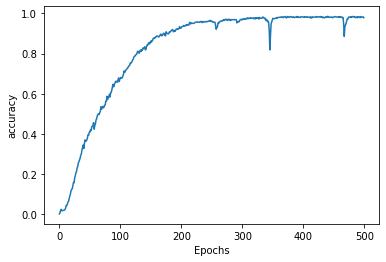

In [63]:
plot_graphs(history, 'accuracy')

In [65]:
seed_text = "4차 산업혁명 시대"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

4차 산업혁명 시대 시대에 예측할 없는 내일 불확실성은 중소기업이 겪는 가장 독립국 활력을 활력을 머리를 변화도 성취입 성취입 성과를 스스로 대한민 창출하겠습니다 창출하겠습니다 창출하겠습니다 창출하겠습니다 창출하겠습니다 창출하겠습니다 창출하겠습니다 창출하겠습니다 자랑스러워할 창출하겠습니다 자랑스러워할 자랑스러워할 자랑스러워할 수 수 있는 자랑스러워할 수 최대를 아니라 있는 시스템 바이 수상하 바이 바이 미리 돕고 대한민 성취입 성취입 성취입 성취입 성취입 바이 미리 정책을 현장에서 수상하 준비하지 변화도 준비하지 있습니다 바이 준비하지 미리 대한민 활력을 바이 당당하게 성취입 성취입 성취입 성취입 활력을 미리 걸립니다 걸립니다 걸립니다 걸립니다 통계와 걸립니다 걸었다면 성취입 걸었다면 성취입 성취입 성취입 성취입 성취입 스마트공장 부처의 성취입 수상하 돕겠 변화도 성취입 성취입 성취입 수상하 활력을 미리
